# Importing Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn

In [2]:
data = pd.read_csv("StudentsPerformance.csv")

In [3]:
data.head(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# Getting the nessesary insights

In [10]:
data.shape

(1000, 8)

In [120]:
data.nunique()

gender                 2
ethnicity              5
parental_education     6
lunch                  2
prep_course            2
math_score            81
reading_score         72
writing_score         77
dtype: int64

In [123]:
data.isnull().sum()

gender                0
ethnicity             0
parental_education    0
lunch                 0
prep_course           0
math_score            0
reading_score         0
writing_score         0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [38]:
data.rename(columns =  { 'race/ethnicity':'ethnicity', 'parental level of education':'parental_education', 'test preparation course':'prep_course'}, inplace = True)
data.columns

Index(['gender', 'ethnicity', 'parental_education', 'lunch', 'prep_course',
       'math_score', 'reading_score', 'writing_score'],
      dtype='object')

## Data Pre Processing

###  1. Cleaning Data

In [124]:
data.isnull().sum()

gender                0
ethnicity             0
parental_education    0
lunch                 0
prep_course           0
math_score            0
reading_score         0
writing_score         0
dtype: int64

#### As we have seen the data has no null values that need to be removed or imputed. 

### 3. Removing Outliers 

In [125]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


####  We see that all the scores lie between the range of 0 and 100. Thus the data has no outliers that need to be removed.

# Statistical/ Categorywise count Analysis

## I. Univariate Analysis

## Insights through Pie Charts

In [6]:
print(data.groupby('race/ethnicity').size())

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
dtype: int64


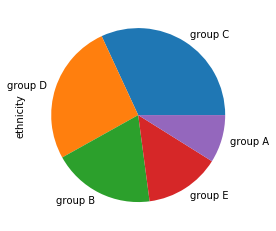

In [39]:
data.ethnicity.value_counts().plot(kind = 'pie')

In [7]:
print(data.groupby('gender').size())

gender
female    518
male      482
dtype: int64


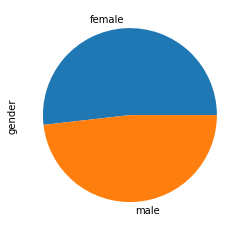

In [36]:
data.gender.value_counts().plot(kind = 'pie')

In [8]:
print(data.groupby('parental level of education').size())

parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
dtype: int64


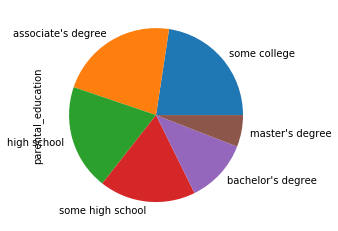

In [40]:
data.parental_education.value_counts().plot(kind = 'pie')

In [9]:
print(data.groupby('lunch').size())

lunch
free/reduced    355
standard        645
dtype: int64


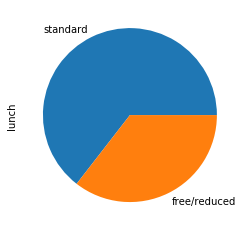

In [35]:
data.lunch.value_counts().plot(kind = 'pie')

In [42]:
data.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

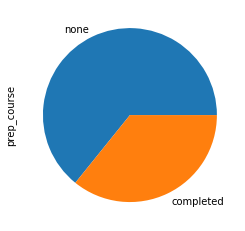

In [41]:
data.prep_course.value_counts().plot(kind='pie')

In [12]:
import seaborn as sns
%matplotlib inline

In [16]:
data.rename(columns = {'reading score':'reading_score','writing score':'writing_score', 'math score':'math_score'}, inplace = True)

In [17]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

## Insights into Scores via Histograms

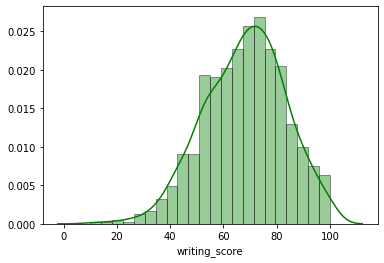

In [25]:
sns.distplot(data['writing_score'], color = 'g',hist_kws=dict(edgecolor="k", linewidth=1))

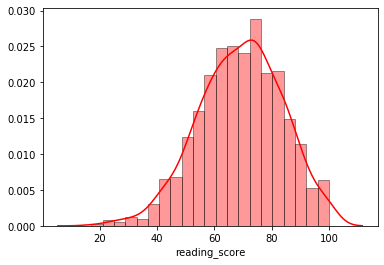

In [26]:
sns.distplot(data['reading_score'], color = 'r',hist_kws=dict(edgecolor="k", linewidth=1))

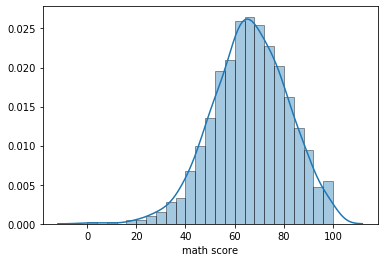

In [15]:
sns.distplot(data['math score'],hist_kws=dict(edgecolor="k", linewidth=1))

In [18]:
print("Minimum score in math is:",data.math_score.min())
print("Minimum score in reading is:",data.reading_score.min())
print("Minimum score in writing is is:",data.writing_score.min())

Minimum score in math is: 0
Minimum score in reading is: 17
Minimum score in writing is is: 10


In [19]:
print("Maximum score in math is:",data.math_score.max())
print("Maximum score in reading is:",data.reading_score.max())
print("Maximum score in writing is is:",data.writing_score.max())

Maximum score in math is: 100
Maximum score in reading is: 100
Maximum score in writing is is: 100


In [20]:
print("Range of math score is from format {} to {}".format(data.math_score.min(),data.math_score.max()))
print("Range of reading score is from format {} to {}".format(data.reading_score.min(),data.reading_score.max()))
print("Range of writing score is from format {} to {}".format(data.writing_score.min(),data.writing_score.max()))

Range of math score is from format 0 to 100
Range of reading score is from format 17 to 100
Range of writing score is from format 10 to 100


## Score Boxplots

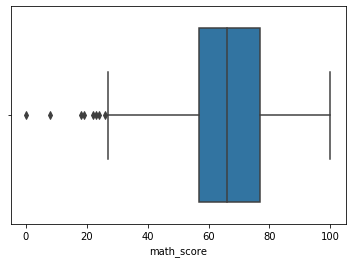

In [21]:
sns.boxplot(data['math_score'])

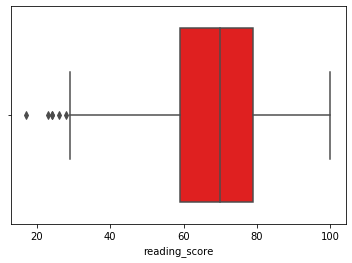

In [27]:
sns.boxplot(data['reading_score'], color = 'r')

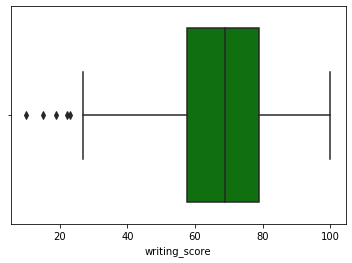

In [28]:
sns.boxplot(data['writing_score'], color = 'g')

#### Reading has the maximum 50th percentile score, whereas Mathematics has the minimum

## Score Violinplots to check Symmetry

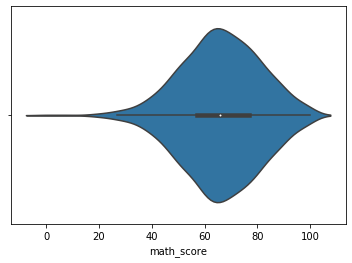

In [111]:
sns.violinplot(data['math_score'])


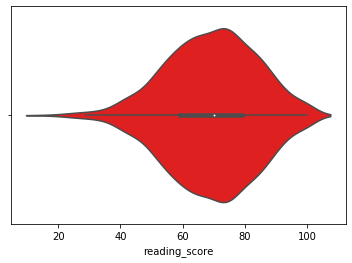

In [33]:
sns.violinplot(data['reading_score'], color = 'r')

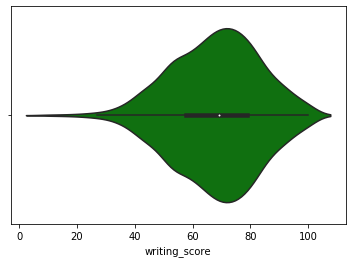

In [34]:
sns.violinplot(data['writing_score'], color = 'g')

##### The scores are distributed fairly symmetrically about the 50th percentile scores

# Relationship Analysis

## II. Bivariate Analysis

## Analysing relationship between Ethnicity and Scores

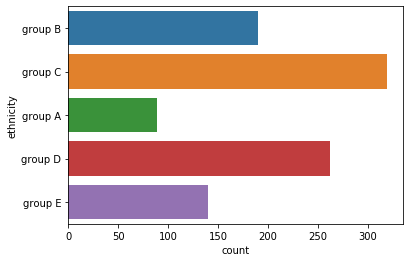

In [43]:
sns.countplot(y = 'ethnicity', data = data, )

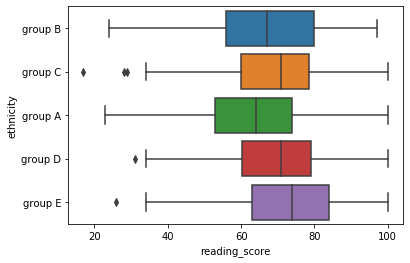

In [44]:
sns.boxplot(x='reading_score', y = 'ethnicity', data = data)

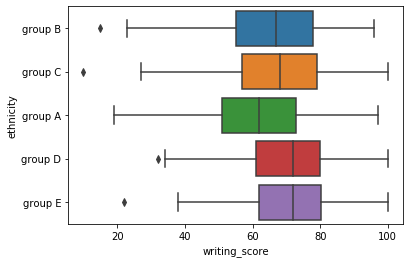

In [45]:
sns.boxplot(x='writing_score', y = 'ethnicity', data = data)

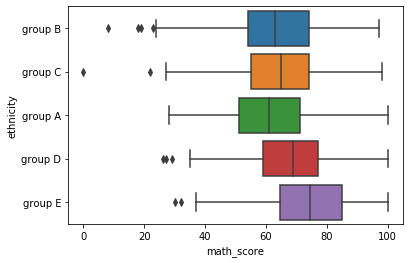

In [46]:
sns.boxplot(x='math_score', y = 'ethnicity', data = data)

####  It is observed that students from group A have scored relatively lesser, whereas students from group E have scored relatively lower.

## Analysing relationship between Completion of Test Preparation Course and Scores

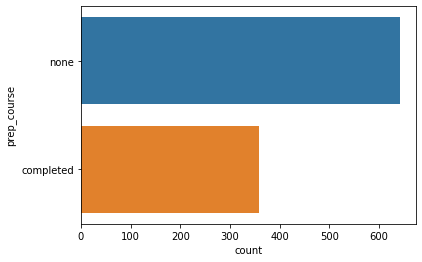

In [47]:
sns.countplot(y = 'prep_course', data = data, )

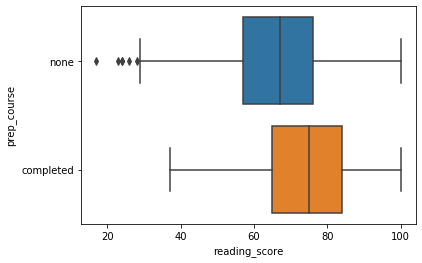

In [48]:
sns.boxplot(x='reading_score', y = 'prep_course', data = data)

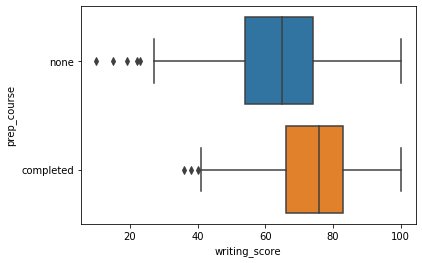

In [49]:
sns.boxplot(x='writing_score', y = 'prep_course', data = data)

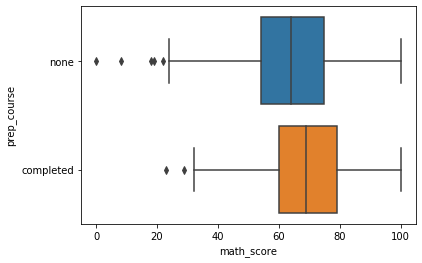

In [50]:
sns.boxplot(x='math_score', y = 'prep_course', data = data)

#### The general trend observed is that students who have completed a test preparation course have scored relatively higher than the students who did not take up any test prepartion course

## Analysing relationship between Parental level of education and Scores

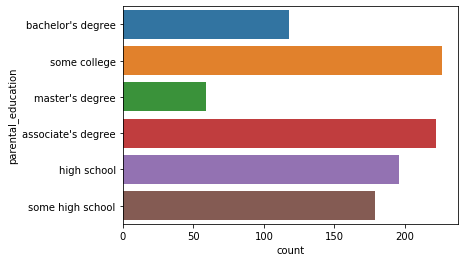

In [51]:
sns.countplot(y = 'parental_education', data = data, )

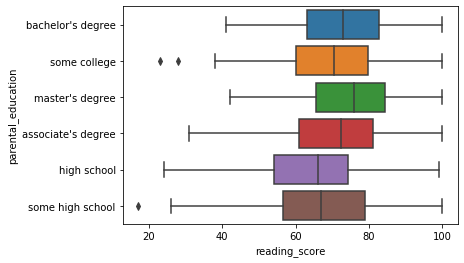

In [52]:
sns.boxplot(x='reading_score', y = 'parental_education', data = data)

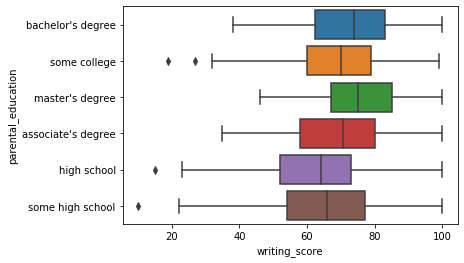

In [53]:
sns.boxplot(x='writing_score', y = 'parental_education', data = data)

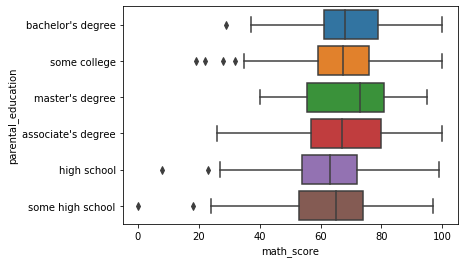

In [54]:
sns.boxplot(x='math_score', y = 'parental_education', data = data)

#### The general trend observed is that students whose parents have a  master's degree have scored higher. Whereas students whose parents have completed only highschool education have scored relatively lower

## Analysing relationship between Gender and Scores

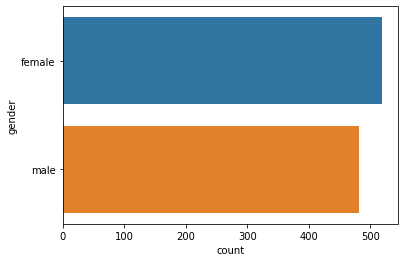

In [116]:
sns.countplot(y = 'gender', data = data, )

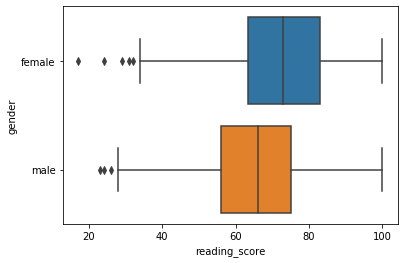

In [117]:
sns.boxplot(x='reading_score', y = 'gender', data = data)

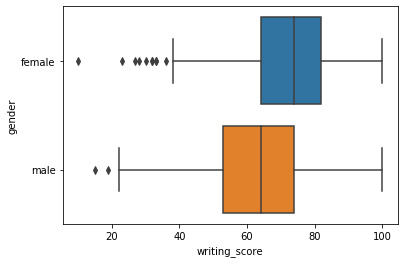

In [118]:
sns.boxplot(x='writing_score', y = 'gender', data = data)

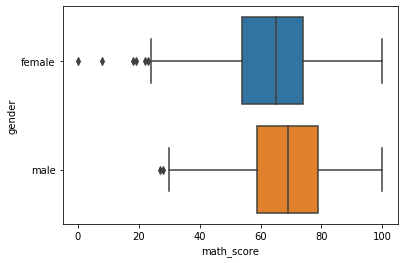

In [119]:
sns.boxplot(x='math_score', y = 'gender', data = data)

#### It is observed that females have scored more in reading and writing and males have score higher in maths on an average

## Analysing relationship between Lunch fee paid and Scores

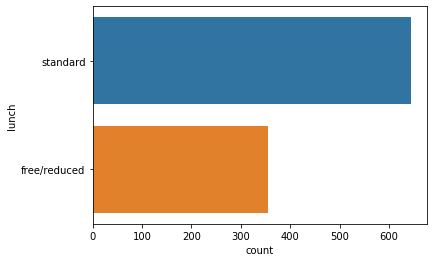

In [59]:
sns.countplot(y = 'lunch', data = data, )

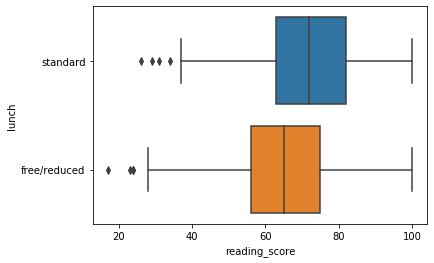

In [60]:
sns.boxplot(x='reading_score', y = 'lunch', data = data)

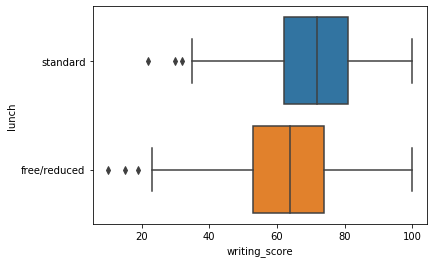

In [61]:
sns.boxplot(x='writing_score', y = 'lunch', data = data)

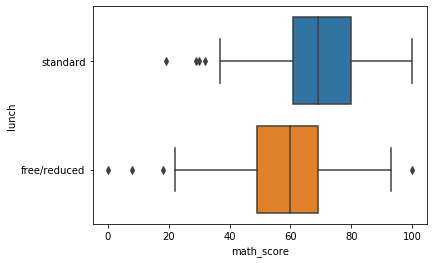

In [62]:
sns.boxplot(x='math_score', y = 'lunch', data = data)

#### The general trend observed is that studentd who pay standard fee for the lunch have scored higher.

## Analysing correlation between Scores though Scatterplots

### 1. Pairplots

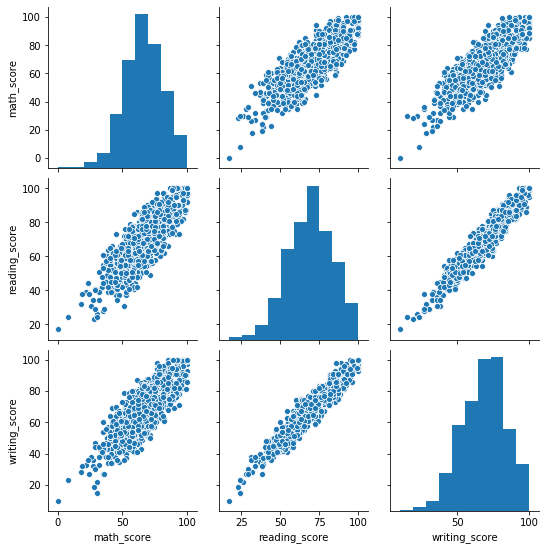

In [63]:
sns.pairplot(data)

## III. Multivariate Analysis

### 2. (a) Gender/Score scatterplots

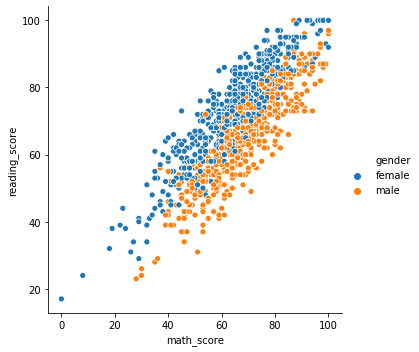

In [127]:
sns.relplot( x= 'math_score', y='reading_score', hue = 'gender', data = data)

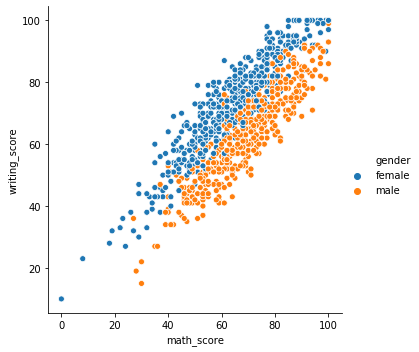

In [128]:
sns.relplot( x= 'math_score', y='writing_score', hue = 'gender', data = data)

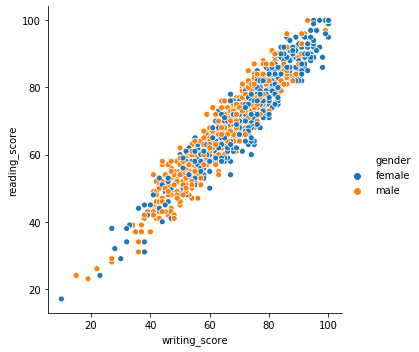

In [129]:
sns.relplot( x= 'writing_score', y='reading_score', hue = 'gender', data = data)

### 2. (b) Lunch /Score scatterplots

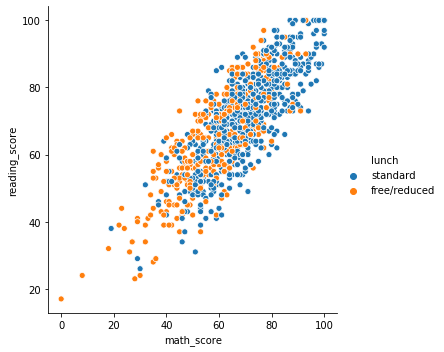

In [130]:
sns.relplot( x= 'math_score', y='reading_score', hue = 'lunch', data = data)

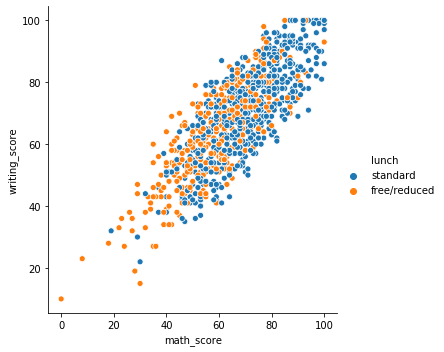

In [131]:
sns.relplot( x= 'math_score', y='writing_score', hue = 'lunch', data = data)

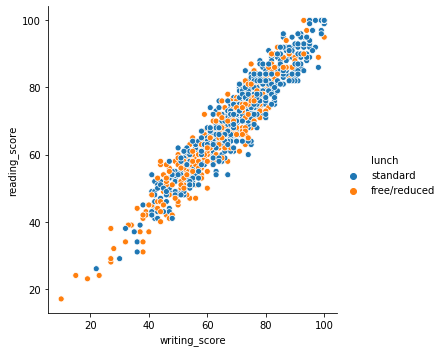

In [132]:
sns.relplot( x= 'writing_score', y='reading_score', hue = 'lunch', data = data)

## (c) Test Preparation Course Completion/Score Relationship

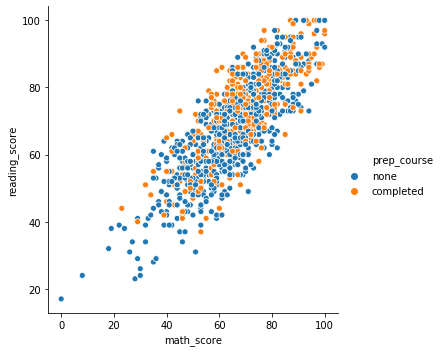

In [133]:
sns.relplot( x= 'math_score', y='reading_score', hue = 'prep_course', data = data)

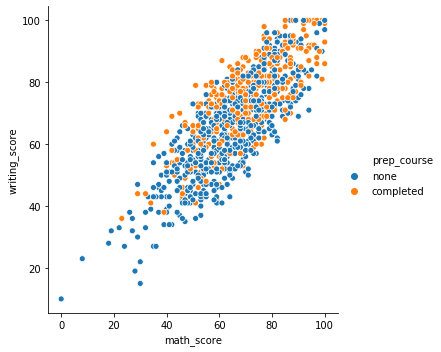

In [134]:
sns.relplot( x= 'math_score', y='writing_score', hue = 'prep_course', data = data)

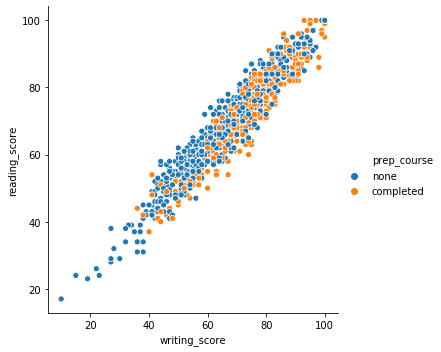

In [135]:
sns.relplot( x= 'writing_score', y='reading_score', hue = 'prep_course', data = data)

### Numerical Score Correlations

In [64]:
data.corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


#### Reading and writing scores are highly correlated

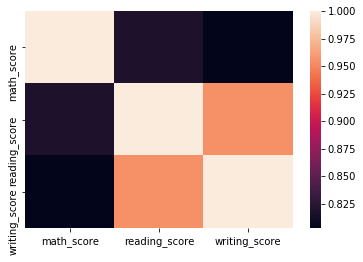

In [65]:
sns.heatmap(data.corr())

## Ananlysing relationships between different non-numerical categories

### 1. Ethnicity and Test Preparation Course Completion

In [90]:
list1 =[]

In [91]:
dt1 = data[(data.ethnicity == 'group A') & (data.prep_course == 'completed')]
dt1.shape
print('No. of people in group A who have completed test preparation course :31')
print('percentage of people in group A who have completed test preparation course : ', (dt1.shape[0]/89)*100)
list1.append((dt1.shape[0]/89)*100)

No. of people in group A who have completed test preparation course :31
percentage of people in group A who have completed test preparation course :  34.831460674157306


In [92]:
dt2 = data[(data.ethnicity == 'group B') & (data.prep_course == 'completed')]
print(dt2.shape)
print('No. of people in group B who have completed test preparation course :68')
print('percentage of people in group b who have completed test preparation course : ', (dt2.shape[0]/190)*100)
list1.append((dt2.shape[0]/190)*100)

(68, 8)
No. of people in group B who have completed test preparation course :68
percentage of people in group b who have completed test preparation course :  35.78947368421053


In [93]:
dt3 = data[(data.ethnicity == 'group C') & (data.prep_course == 'completed')]
print(dt3.shape)
print('No. of people in group C who have completed test preparation course :117')
print('percentage of people in group C who have completed test preparation course : ', (dt3.shape[0]/319)*100)
list1.append((dt3.shape[0]/319)*100)

(117, 8)
No. of people in group C who have completed test preparation course :117
percentage of people in group C who have completed test preparation course :  36.677115987460816


In [94]:
dt4 = data[(data.ethnicity == 'group D') & (data.prep_course == 'completed')]
print(dt4.shape)
print('No. of people in group D who have completed test preparation course :', dt4.shape[0])
print('percentage of people in group D who have completed test preparation course : ', (dt4.shape[0]/262)*100)
list1.append((dt4.shape[0]/262)*100)

(82, 8)
No. of people in group D who have completed test preparation course : 82
percentage of people in group D who have completed test preparation course :  31.297709923664126


In [95]:
dt10 = data[(data.ethnicity == 'group E') & (data.prep_course == 'completed')]
print(dt10.shape)
print('No. of people in group E who have completed test preparation course :', dt10.shape[0])
print('percentage of people in group E who have completed test preparation course : ', (dt10.shape[0]/140)*100)
list1.append((dt10.shape[0]/140)*100)

(60, 8)
No. of people in group E who have completed test preparation course : 60
percentage of people in group E who have completed test preparation course :  42.857142857142854


In [96]:
list1

[34.831460674157306,
 35.78947368421053,
 36.677115987460816,
 31.297709923664126,
 42.857142857142854]

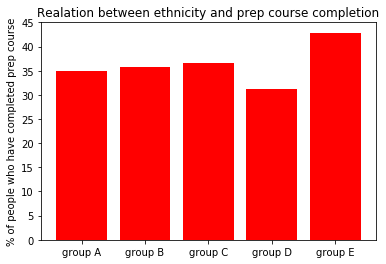

In [109]:
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('group A','group B','group C','group D','group E')
y_pos = np.arange(len(objects))

 
plt.bar(y_pos, list1, alpha=1, color="red")
plt.xticks(y_pos, objects)
plt.ylabel('% of people who have completed prep course')
plt.title('Realation between ethnicity and prep course completion')
plt.show()

#### Students from group E have the highest test preparation course completion rate

### 2. Ethnicity and Lunch Fee Paid

In [97]:
list2 =[]

In [98]:
data.ethnicity.value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

In [99]:
dt5 = data[(data.ethnicity == 'group A') & (data.lunch == 'standard')]
print(dt5.shape)
print('No. of people in group A who pay standard fee for lunch :', dt5.shape[0])
print('percentage of people in group A who pay standard fee for lunch :', (dt5.shape[0]/89)*100)
list2.append((dt5.shape[0]/89)*100)

(53, 8)
No. of people in group A who pay standard fee for lunch : 53
percentage of people in group A who pay standard fee for lunch : 59.55056179775281


In [103]:
dt6 = data[(data.ethnicity == 'group B') & (data.lunch == 'standard')]
print(dt6.shape)
print('No. of people in group B who pay standard fee for lunch :', dt6.shape[0])
print('percentage of people in group B who pay standard fee for lunch :', (dt6.shape[0]/190)*100)
list2.append((dt6.shape[0]/190)*100)

(121, 8)
No. of people in group B who pay standard fee for lunch : 121
percentage of people in group B who pay standard fee for lunch : 63.68421052631579


In [104]:
dt7 = data[(data.ethnicity == 'group C') & (data.lunch == 'standard')]
print(dt7.shape)
print('No. of people in group C who pay standard fee for lunch :', dt7.shape[0])
print('percentage of people in group C who pay standard fee for lunch :', (dt7.shape[0]/319)*100)
list2.append( (dt7.shape[0]/319)*100)

(205, 8)
No. of people in group C who pay standard fee for lunch : 205
percentage of people in group C who pay standard fee for lunch : 64.26332288401254


In [105]:
dt8 = data[(data.ethnicity == 'group D') & (data.lunch == 'standard')]
print(dt8.shape)
print('No. of people in group D who pay standard fee for lunch :', dt8.shape[0])
print('percentage of people in group D who pay standard fee for lunch :', (dt8.shape[0]/262)*100)
list2.append((dt8.shape[0]/262)*100)

(167, 8)
No. of people in group D who pay standard fee for lunch : 167
percentage of people in group D who pay standard fee for lunch : 63.74045801526718


In [106]:
dt9 = data[(data.ethnicity == 'group E') & (data.lunch == 'standard')]
print(dt9.shape)
print('No. of people in group E who pay standard fee for lunch :', dt9.shape[0])
print('percentage of people in group E who pay standard fee for lunch :', (dt9.shape[0]/140)*100)
list2.append((dt9.shape[0]/140)*100)

(99, 8)
No. of people in group E who pay standard fee for lunch : 99
percentage of people in group E who pay standard fee for lunch : 70.71428571428572


In [107]:
list2

[59.55056179775281,
 63.68421052631579,
 64.26332288401254,
 63.74045801526718,
 70.71428571428572]

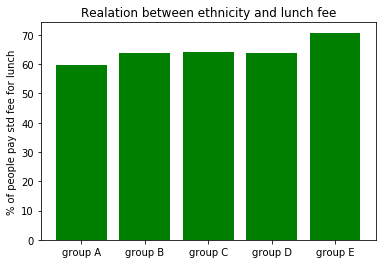

In [110]:
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('group A','group B','group C','group D','group E')
y_pos = np.arange(len(objects))

 
plt.bar(y_pos, list2, alpha=1, color="green")
plt.xticks(y_pos, objects)
plt.ylabel('% of people pay std fee for lunch')
plt.title('Realation between ethnicity and lunch fee')
plt.show()

#### Group E has the highest percentage of students who pay the standard fee for lunch